# San Diego Zipcode Clustering by Decmographic Features

### E-Bike Project under Center for Community Energy (CCE)

##### Author
- Zhihan Li (Claire)
- Ethan Hu

### Introduciton

San Diego County, renowned for its diverse array of sub-level communities, offers a rich tapestry of perspectives and lifestyles. In an effort to gain deeper insights into the attitudes and concerns of the San Diego community towards e-bikes, we conducted a comprehensive survey among community members. Recognizing the intricacies of this multifaceted community, we believed that the survey results should be presented on a more localized scale, within smaller neighborhoods exhibiting comparable characteristics.

To this end, we embarked on a systematic process of segmenting the community into sub-level areas characterized by similar demographic features. This segmentation would afford us a more granular understanding of the distinctive features that define each locality. Our methodology centered on the application of unsupervised K-means clustering, leveraging standardized datasets encompassing a comprehensive array of demographic variables uniquely associated with each zipcode. Standardizing the demographic features ensures that each feature contribute equally to the clustering outcome, meaning no one feature is dominating the clustering process simply because it has a larger scale. After performing the clustering analysis, we calculated the variance of each feature. The results affirm the fairness of the clustering, indicating that the features contribute to the clusters in a balanced manner.

This Notebook demonstrates our application of K-means clustering on 96 San Diego Zipcodes, delineated by their respective 34 demographic features. Through this experimentation, we hope to offer a robust foundation for subsequent in-depth analyses and policy recommendations tailored to the specific needs and characteristics of each identified cluster.

### Setup

In [1]:
import pandas as pd
import numpy as np

### Load & Clean Zipcode Data

In [2]:
# Load csv file of San Diego Zipcode
original_df = pd.read_csv('San Diego 2021 Zipcode.csv')
df = pd.read_csv('San Diego 2021 Zipcode.csv')
print(f'Number of Rows before Drop NaN: {len(df)}')

# drop any row with nan
original_df = original_df.dropna()
df = df.dropna()
print(f'Number of Rows before Drop NaN: {len(df)}')

# Set zipcode column to be the index
original_df.set_index('Zipcode', inplace=True)
df.set_index('Zipcode', inplace=True)

# Show the first few row of the dataframe
df

Number of Rows before Drop NaN: 113
Number of Rows before Drop NaN: 96


,Population,Land Area (Sq. Miles),Population Density (People per Square Mile),Median Age,Population By Age % (Under 18 Years),Population By Age % (18 to 34),Population By Age % (35 to 64),Population By Age % (65 and Over),Male %,White %,...,Carpooled %,Public Transit %,Motorcycle %,Bicycle %,Walked %,Other %.1,Worked at Home %,Health Insurance Coverage %,Married %,Median House Value $
Zipcode,,,,,,,,,,,,,,,,,,,,,
91902,17759.0,11.22,1583.23,45.8,17.62,20.69,38.98,22.72,48.33,37.37,...,5.10,0.97,0.16,0.37,0.00,1.53,10.71,94.78,52.66,732000.0
91910,76291.0,12.59,6061.25,38.2,21.70,23.58,39.95,14.77,49.92,20.32,...,9.54,3.86,0.52,0.29,0.95,0.57,8.75,91.27,48.09,549100.0
91911,88589.0,12.73,6960.37,35.8,24.01,24.85,38.28,12.86,48.26,12.75,...,11.53,4.16,0.18,0.19,1.23,1.04,5.67,90.78,49.91,485300.0
91913,53725.0,9.10,5906.59,35.0,25.91,24.07,39.45,10.58,50.70,13.64,...,9.89,0.87,0.26,0.00,1.29,2.28,11.35,93.92,53.91,578600.0
91914,17742.0,6.64,2670.34,37.1,25.17,20.57,44.35,9.92,52.68,18.14,...,6.05,1.19,0.08,0.43,7.09,3.51,10.57,93.01,61.59,739300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92081,29944.0,8.94,3351.09,37.2,22.70,23.30,40.92,13.08,51.13,54.44,...,5.30,0.72,0.95,0.11,1.22,0.44,12.79,91.90,49.03,599400.0
92083,38875.0,5.55,7008.14,33.1,26.01,27.68,36.28,10.03,50.05,26.63,...,6.67,1.97,0.65,0.18,1.25,2.40,5.81,86.26,47.16,467600.0
92084,49759.0,28.34,1755.69,35.1,23.92,25.97,37.22,12.89,51.87,41.69,...,8.07,0.52,0.03,0.28,0.78,0.84,9.61,87.58,47.87,600600.0


### Normalize Data

In [3]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to normalize
columns_to_normalize = df.columns

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(df[columns_to_normalize])

# Transform the selected columns with Z-score scaling
df[columns_to_normalize] = scaler.transform(df[columns_to_normalize])

# Display the normalized DataFrame
df

,Population,Land Area (Sq. Miles),Population Density (People per Square Mile),Median Age,Population By Age % (Under 18 Years),Population By Age % (18 to 34),Population By Age % (35 to 64),Population By Age % (65 and Over),Male %,White %,...,Carpooled %,Public Transit %,Motorcycle %,Bicycle %,Walked %,Other %.1,Worked at Home %,Health Insurance Coverage %,Married %,Median House Value $
Zipcode,,,,,,,,,,,,,,,,,,,,,
91902,-0.810811,-0.291858,-0.677925,0.957445,-0.648347,-0.378475,0.052311,-0.052901,-0.644861,-0.600839,...,-0.707695,-0.521183,-0.407319,-0.145270,-0.874593,0.524611,-0.480817,0.467977,0.117090,0.180409
91910,1.847808,-0.279514,0.657912,-0.178781,0.069802,-0.014698,0.296724,-0.113913,-0.124802,-1.425166,...,0.681427,0.860405,0.085917,-0.255952,-0.493590,-0.525066,-0.811411,-0.332152,-0.400228,-0.432641
91911,2.406404,-0.278253,0.926128,-0.537589,0.476401,0.145162,-0.124070,-0.128571,-0.667757,-1.791157,...,1.304029,1.003822,-0.379917,-0.394305,-0.381295,-0.011162,-1.330917,-0.443851,-0.194206,-0.646487
91913,0.822824,-0.310958,0.611775,-0.657192,0.810833,0.046980,0.170738,-0.146069,0.130321,-1.748127,...,0.790930,-0.568989,-0.270309,-0.657175,-0.357231,1.344671,-0.372868,0.271934,0.258588,-0.333762
91914,-0.811584,-0.333122,-0.353629,-0.343235,0.680580,-0.393580,1.405403,-0.151134,0.777942,-1.530563,...,-0.410473,-0.416010,-0.516927,-0.062259,1.968888,2.689569,-0.504431,0.064493,1.127953,0.204877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92081,-0.257349,-0.312400,-0.150555,-0.328285,0.245819,-0.049943,0.541137,-0.126883,0.270966,0.224454,...,-0.645122,-0.640697,0.675060,-0.504987,-0.385305,-0.667210,-0.129982,-0.188539,-0.293821,-0.264044
92083,0.148312,-0.342942,0.940378,-0.941249,0.828434,0.501386,-0.628015,-0.150290,-0.082281,-1.120092,...,-0.216496,-0.043125,0.264030,-0.408140,-0.373274,1.475880,-1.307303,-1.474217,-0.505502,-0.705815
92084,0.642681,-0.137613,-0.626478,-0.642242,0.460559,0.286141,-0.391161,-0.128341,0.513006,-0.391978,...,0.221515,-0.736309,-0.585432,-0.269787,-0.561770,-0.229845,-0.666354,-1.173313,-0.425131,-0.260022


### Clustering by Unsupervised Machine Learning (All features)

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Choose the number of clusters (n_clusters)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/Users/lizhihan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
# Assign label to each zipcode
original_df['label'] = cluster_labels

##### Checking Cluster Centers

In [6]:
# Cluster center 0
original_df[original_df['label'] == 0].mean()

Population                                     3.143637e+04
Land Area (Sq. Miles)                          2.819053e+01
Population Density (People per Square Mile)    2.555291e+03
Median Age                                     4.327368e+01
Population By Age % (Under 18 Years)           2.244053e+01
Population By Age % (18 to 34)                 1.677947e+01
Population By Age % (35 to 64)                 4.197737e+01
Population By Age % (65 and Over)              1.880158e+01
Male %                                         4.904632e+01
White %                                        6.387316e+01
Black %                                        1.220000e+00
Asian %                                        1.408579e+01
Hispanic %                                     1.450947e+01
Other %                                        6.311579e+00
Less Than High School %                        4.322105e+00
High School Grad or Higher %                   9.567789e+01
Bachelor's Degree or Higher %           

In [7]:
# Cluster center 1
original_df[original_df['label'] == 1].mean()

Population                                      43206.8400
Land Area (Sq. Miles)                              19.6372
Population Density (People per Square Mile)      3687.2684
Median Age                                         37.3520
Population By Age % (Under 18 Years)               22.6524
Population By Age % (18 to 34)                     24.2132
Population By Age % (35 to 64)                     38.6020
Population By Age % (65 and Over)                  14.5336
Male %                                             49.9220
White %                                            45.5236
Black %                                             4.3404
Asian %                                            12.5540
Hispanic %                                         31.9652
Other %                                             5.6168
Less Than High School %                             9.2976
High School Grad or Higher %                       90.7024
Bachelor's Degree or Higher %                      39.60

In [8]:
# Cluster center 2
original_df[original_df['label'] == 2].mean()

Population                                       7705.928571
Land Area (Sq. Miles)                             124.183571
Population Density (People per Square Mile)        86.732857
Median Age                                         48.028571
Population By Age % (Under 18 Years)               19.605000
Population By Age % (18 to 34)                     17.348571
Population By Age % (35 to 64)                     39.699286
Population By Age % (65 and Over)                  23.347857
Male %                                             52.848571
White %                                            66.637857
Black %                                             1.227857
Asian %                                             1.798571
Hispanic %                                         21.753571
Other %                                             8.582143
Less Than High School %                            10.139286
High School Grad or Higher %                       89.860714
Bachelor's Degree or Hig

In [9]:
# Cluster center 3
original_df[original_df['label'] == 3].mean()

Population                                      50811.708333
Land Area (Sq. Miles)                              16.830417
Population Density (People per Square Mile)      6095.790417
Median Age                                         34.316667
Population By Age % (Under 18 Years)               24.758333
Population By Age % (18 to 34)                     26.359583
Population By Age % (35 to 64)                     37.030417
Population By Age % (65 and Over)                  65.392917
Male %                                             49.413333
White %                                            26.110000
Black %                                             7.109167
Asian %                                             9.643333
Hispanic %                                         51.703750
Other %                                             5.433750
Less Than High School %                            20.258750
High School Grad or Higher %                       79.741250
Bachelor's Degree or Hig

In [10]:
# Cluster center 4
original_df[original_df['label'] == 4].mean()

Population                                      31610.230769
Land Area (Sq. Miles)                               7.923846
Population Density (People per Square Mile)      6300.520769
Median Age                                         35.938462
Population By Age % (Under 18 Years)               13.314615
Population By Age % (18 to 34)                     35.798462
Population By Age % (35 to 64)                     37.091538
Population By Age % (65 and Over)                  13.796154
Male %                                             52.343846
White %                                            61.896154
Black %                                             3.755385
Asian %                                             9.531538
Hispanic %                                         19.090000
Other %                                             5.726923
Less Than High School %                             3.982308
High School Grad or Higher %                       96.017692
Bachelor's Degree or Hig

In [11]:
# Cluster center 5
original_df[original_df['label'] == 5].mean()

Population                                       2779.00
Land Area (Sq. Miles)                             914.88
Population Density (People per Square Mile)         3.04
Median Age                                         62.80
Population By Age % (Under 18 Years)               10.69
Population By Age % (18 to 34)                      9.86
Population By Age % (35 to 64)                     32.82
Population By Age % (65 and Over)                  46.64
Male %                                             42.75
White %                                            64.66
Black %                                             0.04
Asian %                                             0.04
Hispanic %                                         35.26
Other %                                             0.00
Less Than High School %                             8.56
High School Grad or Higher %                       91.44
Bachelor's Degree or Higher %                      28.53
Media Household Income $       

##### Map demostrating the clustering result
**Note that the K-means clustering can produce different results on different runs due to its reliance on random initialization. 
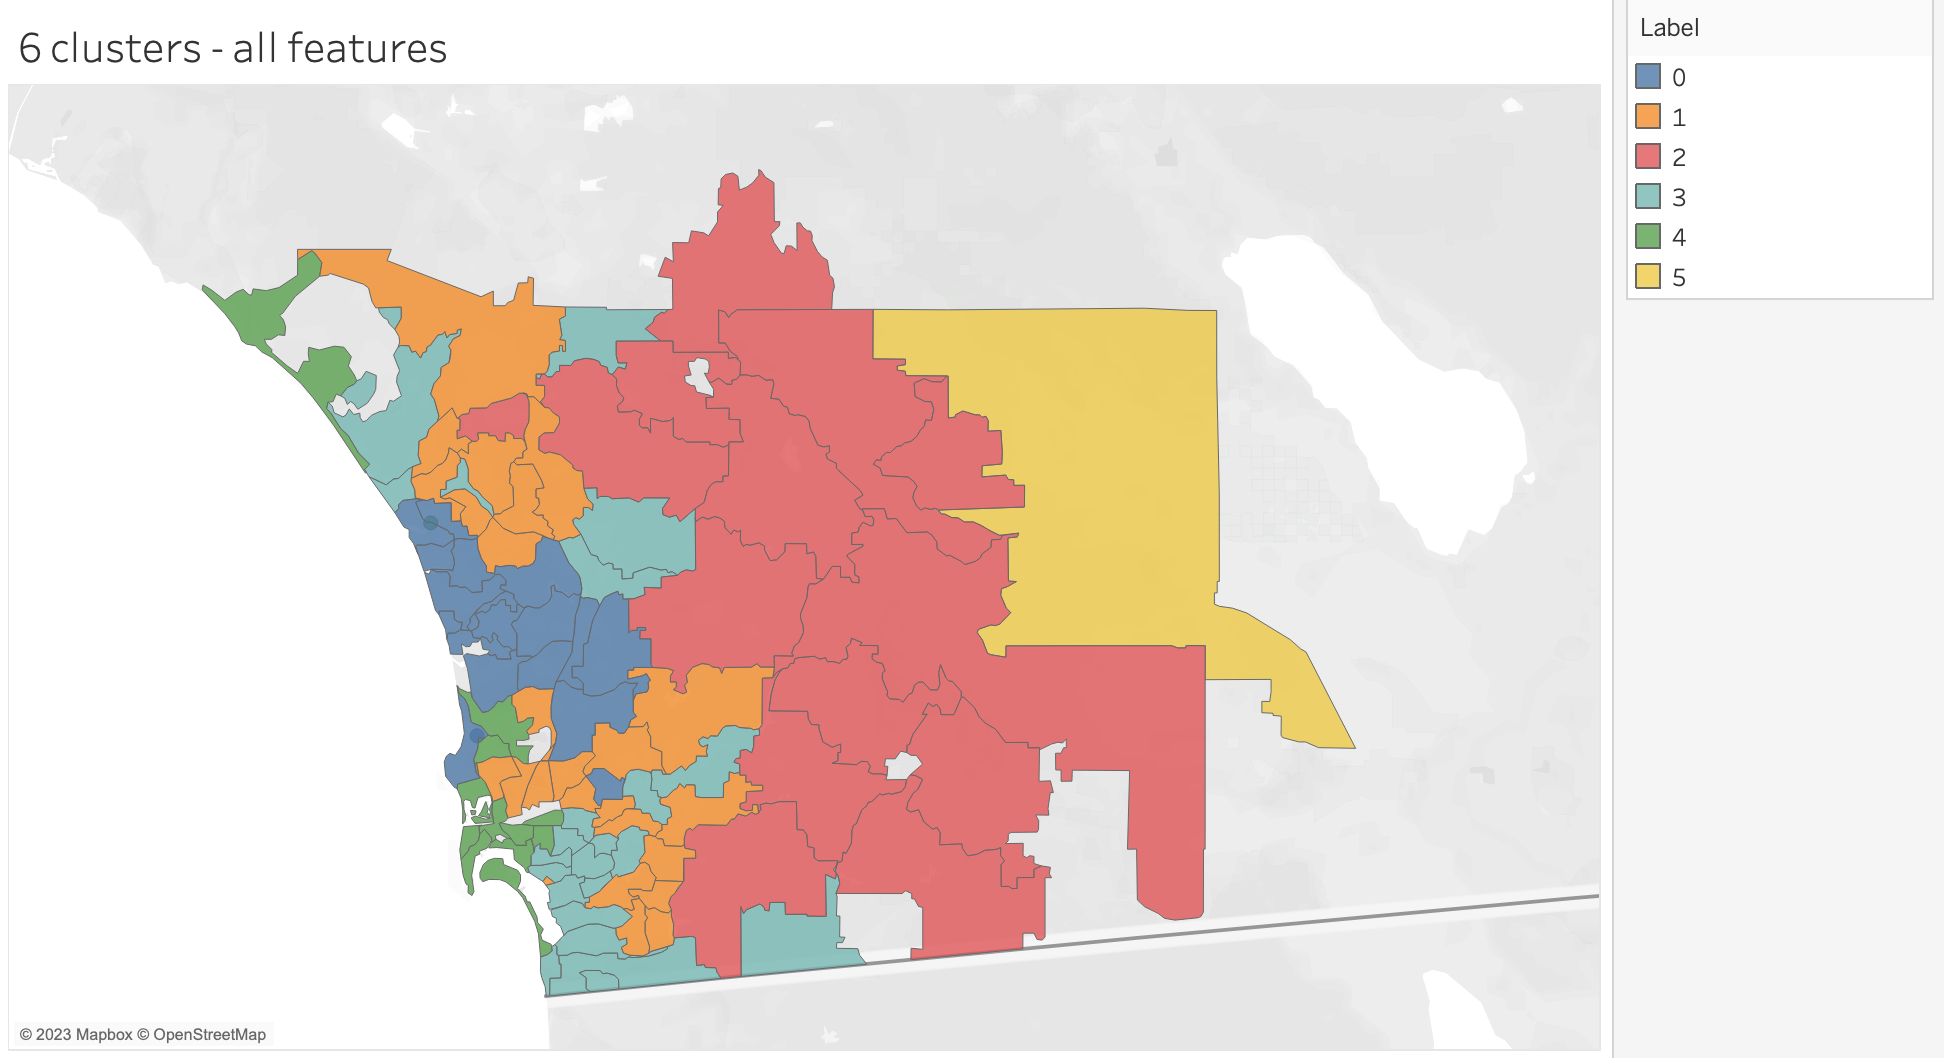

In [12]:
# Create a dataframe to save centroids information
centroids_df = pd.DataFrame(original_df[original_df['label'] == 0].mean())

In [13]:
# Save all centroids information into a dataframe
centroids_df = centroids_df.transpose()
centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 1].mean()).transpose())
centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 2].mean()).transpose())
centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 3].mean()).transpose())
centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 4].mean()).transpose())
centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 5].mean()).transpose())

/var/folders/f1/hpxtn3d96hng6hkcdpysml1m0000gn/T/ipykernel_14518/1974664708.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 1].mean()).transpose())
/var/folders/f1/hpxtn3d96hng6hkcdpysml1m0000gn/T/ipykernel_14518/1974664708.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 2].mean()).transpose())
/var/folders/f1/hpxtn3d96hng6hkcdpysml1m0000gn/T/ipykernel_14518/1974664708.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroids_df = centroids_df.append(pd.DataFrame(original_df[original_df['label'] == 3].mean()).transpose())
/var/folders/f1/hpxtn3d96

In [14]:
# Fix index
centroids_df = centroids_df.reset_index()
centroids_df = centroids_df.drop(columns=['index'])

In [15]:
# Round all values to two decimal points
centroids_df = centroids_df.apply(lambda x: x.round(2))

# Cast all non-percentage variables into integers
for col in centroids_df.columns:
    if '%' not in col:
        if col != 'Gini Index':
            centroids_df[col] = centroids_df[col].astype(int)

centroids_df

,Population,Land Area (Sq. Miles),Population Density (People per Square Mile),Median Age,Population By Age % (Under 18 Years),Population By Age % (18 to 34),Population By Age % (35 to 64),Population By Age % (65 and Over),Male %,White %,...,Public Transit %,Motorcycle %,Bicycle %,Walked %,Other %.1,Worked at Home %,Health Insurance Coverage %,Married %,Median House Value $,label
0,31436,28,2555,43,22.44,16.78,41.98,18.80,49.05,63.87,...,1.00,0.64,0.53,1.67,0.96,20.23,95.67,58.75,1029552,0
1,43206,19,3687,37,22.65,24.21,38.60,14.53,49.92,45.52,...,1.45,0.52,0.27,1.30,1.14,11.57,93.60,52.37,619240,1
2,7705,124,86,48,19.60,17.35,39.70,23.35,52.85,66.64,...,0.16,0.12,0.00,1.99,0.86,12.72,92.37,56.18,488085,2
3,50811,16,6095,34,24.76,26.36,37.03,65.39,49.41,26.11,...,4.23,0.42,0.29,2.10,1.03,8.28,88.58,47.10,486125,3
4,31610,7,6300,35,13.31,35.80,37.09,13.80,52.34,61.90,...,2.96,0.56,1.68,5.12,1.33,16.57,94.66,41.90,864738,4
5,2779,914,3,62,10.69,9.86,32.82,46.64,42.75,64.66,...,0.00,0.00,0.00,0.20,0.00,35.98,94.60,69.04,320600,5


##### Store cluster centroids dataframe into csv and excel files

In [ ]:
# Export the centroid dataframe as a csv file
csv_filename = 'centroids for 6 clusters - all features.csv' 
centroids_df.to_csv(csv_filename, index=True)

# Export the centroid dataframe as a csv file
excel_filename = 'centroids for 6 clusters - all features.xlsx' 
centroids_df.to_excel(excel_filename, index=True)

##### Checking features' influence on clustering

In [16]:
# Variance check
variances = np.var(df, axis=0)

# Features with highest variance first
feature_ranking = np.argsort(variances)[::-1]  

print("Ranking of features by variance:")
for idx in feature_ranking:
    print(f"{df.columns[idx]}, Variance = {variances[idx]}")

Ranking of features by variance:
Gini Index, Variance = 1.0000000000000007
Population By Age % (18 to 34), Variance = 1.0000000000000007
Motorcycle %, Variance = 1.0000000000000004
Married %, Variance = 1.0000000000000004
Average Commute to Work (min), Variance = 1.0000000000000004
Media Household Income $, Variance = 1.0000000000000004
Bachelor's Degree or Higher %, Variance = 1.0000000000000002
Land Area (Sq. Miles), Variance = 1.0000000000000002
Median Age, Variance = 1.0000000000000002
Population By Age % (35 to 64), Variance = 1.0000000000000002
Asian %, Variance = 1.0000000000000002
Other %, Variance = 1.0000000000000002
High School Grad or Higher %, Variance = 1.0000000000000002
Population, Variance = 1.0000000000000002
Unemployed % , Variance = 1.0000000000000002
Worked at Home %, Variance = 1.0000000000000002
Walked %, Variance = 1.0000000000000002
Public Transit %, Variance = 1.0000000000000002
Black %, Variance = 1.0
Population By Age % (Under 18 Years), Variance = 1.0
Popul

##### Export clustered zipcode data

In [ ]:
# Export clustered dataframe as a csv file
csv_filename = 'labeled SD zipcode 6 clusters.csv' 
original_df.to_csv(csv_filename, index=True)

### Unsupervised Clustering (Commute Features)

Given our belief that commute distance plays a pivotal role in influencing our community members' likelihood to try e-bike commuting, we find it might be pertinent to focus our clustering analysis solely on demographic features relevant to commuting. As a result, we have conducted a K-means clustering using zipcode data relavent to commute time and means of transportation. Although this version of clustering has not been selected for our analysis, we wish to keep it here as a reference for future researchers who're interested in conducting similar experiment. 

In [17]:
commute_df = df[['Average Commute to Work (min)', 'Drove Alone %', 'Carpooled %',
       'Public Transit %', 'Motorcycle %', 'Bicycle %', 'Walked %',
       'Other %.1', 'Worked at Home %']]
commute_df

,Average Commute to Work (min),Drove Alone %,Carpooled %,Public Transit %,Motorcycle %,Bicycle %,Walked %,Other %.1,Worked at Home %
Zipcode,,,,,,,,,
91902,-0.126458,1.237120,-0.707695,-0.521183,-0.407319,-0.145270,-0.874593,0.524611,-0.480817
91910,-0.126458,0.395576,0.681427,0.860405,0.085917,-0.255952,-0.493590,-0.525066,-0.811411
91911,0.201650,0.470049,1.304029,1.003822,-0.379917,-0.394305,-0.381295,-0.011162,-1.330917
91913,0.529757,0.179604,0.790930,-0.568989,-0.270309,-0.657175,-0.357231,1.344671,-0.372868
91914,0.037596,-0.265744,-0.410473,-0.416010,-0.516927,-0.062259,1.968888,2.689569,-0.504431
...,...,...,...,...,...,...,...,...,...
92081,-0.290512,0.836456,-0.645122,-0.640697,0.675060,-0.504987,-0.385305,-0.667210,-0.129982
92083,-0.126458,1.223715,-0.216496,-0.043125,0.264030,-0.408140,-0.373274,1.475880,-1.307303
92084,0.037596,1.044980,0.221515,-0.736309,-0.585432,-0.269787,-0.561770,-0.229845,-0.666354


In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(commute_df)

# Choose the number of clusters (n_clusters)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/Users/lizhihan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
# Assign label to each zipcode
original_df['label'] = cluster_labels

In [20]:
# Cluster center 0
original_df[original_df['label'] == 0].mean()

Population                                      44097.2400
Land Area (Sq. Miles)                              27.4778
Population Density (People per Square Mile)      4057.3390
Median Age                                         37.6140
Population By Age % (Under 18 Years)               22.1728
Population By Age % (18 to 34)                     24.9458
Population By Age % (35 to 64)                     38.3138
Population By Age % (65 and Over)                  40.2682
Male %                                             50.1294
White %                                            44.0638
Black %                                             5.0150
Asian %                                            10.5918
Hispanic %                                         34.8244
Other %                                             5.5050
Less Than High School %                            11.6800
High School Grad or Higher %                       88.3200
Bachelor's Degree or Higher %                      34.71

In [21]:
# Cluster center 1
original_df[original_df['label'] == 1].mean()

Population                                      30461.571429
Land Area (Sq. Miles)                              11.279286
Population Density (People per Square Mile)      4689.104286
Median Age                                         37.085714
Population By Age % (Under 18 Years)               16.454286
Population By Age % (18 to 34)                     31.404286
Population By Age % (35 to 64)                     36.736429
Population By Age % (65 and Over)                  15.405714
Male %                                             52.257143
White %                                            60.425714
Black %                                             3.105000
Asian %                                            10.395000
Hispanic %                                         20.331429
Other %                                             5.742857
Less Than High School %                             4.317857
High School Grad or Higher %                       95.682143
Bachelor's Degree or Hig

In [22]:
# Cluster center 2
original_df[original_df['label'] == 2].mean()

Population                                      42230.166667
Land Area (Sq. Miles)                              12.788333
Population Density (People per Square Mile)      8549.828333
Median Age                                         33.333333
Population By Age % (Under 18 Years)               27.886667
Population By Age % (18 to 34)                     24.571667
Population By Age % (35 to 64)                     38.313333
Population By Age % (65 and Over)                   9.223333
Male %                                             48.245000
White %                                            17.658333
Black %                                             6.261667
Asian %                                             8.943333
Hispanic %                                         64.448333
Other %                                             2.688333
Less Than High School %                            28.015000
High School Grad or Higher %                       71.985000
Bachelor's Degree or Hig

In [23]:
# Cluster center 3
original_df[original_df['label'] == 3].mean()

Population                                        9060.00
Land Area (Sq. Miles)                               22.39
Population Density (People per Square Mile)        404.59
Median Age                                          46.50
Population By Age % (Under 18 Years)                24.38
Population By Age % (18 to 34)                      11.38
Population By Age % (35 to 64)                      41.08
Population By Age % (65 and Over)                   23.16
Male %                                              45.49
White %                                             72.63
Black %                                              0.00
Asian %                                              6.40
Hispanic %                                          15.97
Other %                                              5.00
Less Than High School %                              1.22
High School Grad or Higher %                        98.78
Bachelor's Degree or Higher %                       71.59
Media Househol

In [24]:
# Cluster center 4
original_df[original_df['label'] == 4].mean()

Population                                      26963.736842
Land Area (Sq. Miles)                              77.171053
Population Density (People per Square Mile)      2622.998947
Median Age                                         43.973684
Population By Age % (Under 18 Years)               21.655789
Population By Age % (18 to 34)                     17.578421
Population By Age % (35 to 64)                     40.788947
Population By Age % (65 and Over)                  19.977895
Male %                                             48.846842
White %                                            59.377368
Black %                                             1.382632
Asian %                                            11.391053
Hispanic %                                         19.812105
Other %                                             8.036842
Less Than High School %                             6.554737
High School Grad or Higher %                       93.445263
Bachelor's Degree or Hig

In [25]:
# Cluster center 5
original_df[original_df['label'] == 5].mean()

Population                                       2077.000000
Land Area (Sq. Miles)                             181.628333
Population Density (People per Square Mile)        16.721667
Median Age                                         50.016667
Population By Age % (Under 18 Years)               17.161667
Population By Age % (18 to 34)                     15.856667
Population By Age % (35 to 64)                     41.033333
Population By Age % (65 and Over)                  25.948333
Male %                                             54.638333
White %                                            70.776667
Black %                                             1.716667
Asian %                                             1.740000
Hispanic %                                         16.455000
Other %                                             9.311667
Less Than High School %                            10.791667
High School Grad or Higher %                       89.208333
Bachelor's Degree or Hig

In [27]:
# Export clustered dataframe as a csv file
csv_filename = 'labeled SD zipcode 6 clusters - commute only.csv' 
original_df.to_csv(csv_filename,index=True)